In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.read_csv('D:\Python\Markowitz_Data.csv', index_col = 'Date')

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,61.119999,1132.989990
2010-01-05,61.139999,1136.520020
2010-01-06,60.849998,1137.140015
2010-01-07,60.520000,1141.689941
2010-01-08,60.439999,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


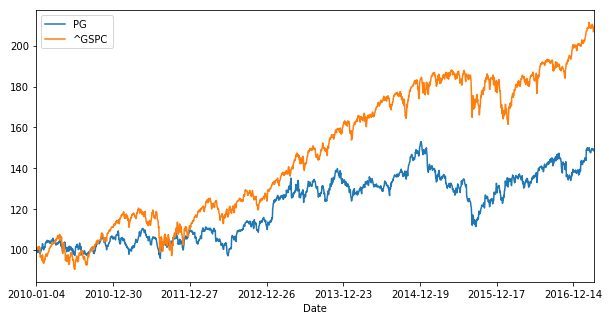

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([ 0.78702573,  0.22429849])

In [13]:
arr[0] + arr[1]

1.011324223433018

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.8858455,  0.1141545])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.059320403983459294

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.018901951652869096

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13748436875830319

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.097561019574061478,
  0.087966070460974807,
  0.082977406777242468,
  0.093177724085915362,
  0.067440572070503857,
  0.075414357434436058,
  0.067534252535500994,
  0.093129422285591706,
  0.064471718178838927,
  0.068036281066447477,
  0.074832520001304567,
  0.060376320438315749,
  0.079060891955157461,
  0.099327946941015363,
  0.069395673843707512,
  0.057629147046803546,
  0.094583066887929057,
  0.082088681834070337,
  0.087632604312870205,
  0.080422668689039634,
  0.083880753053181017,
  0.060349032439610206,
  0.066373738261058329,
  0.074928104511752178,
  0.059488316065082793,
  0.072629245254405048,
  0.07067512280133878,
  0.056039966472175948,
  0.072226724012024873,
  0.087617166073623853,
  0.07522974012770757,
  0.084354233923876754,
  0.072180268476276149,
  0.068599840797349237,
  0.062194267210800194,
  0.078921054601795534,
  0.096938335340397086,
  0.08075574813933542,
  0.065930456039066096,
  0.068798713331308076,
  0.0783248954668046,
  0.09810253781146233

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.05495065,  0.09726459,  0.06325796,  0.08589128,  0.06978802,
         0.08971745,  0.07413825,  0.06517245,  0.06892852,  0.07881874,
         0.0572379 ,  0.07447767,  0.07949534,  0.05905853,  0.06084446,
         0.06461053,  0.0900932 ,  0.07837721,  0.09073028,  0.06687056,
         0.09544568,  0.05875838,  0.08007173,  0.06129918,  0.07545471,
         0.07661358,  0.08840568,  0.090508  ,  0.07569807,  0.06144189,
         0.07119024,  0.05742081,  0.08083176,  0.08099761,  0.0782011 ,
         0.08537525,  0.09666744,  0.05960549,  0.05986081,  0.06838781,
         0.05445446,  0.07274079,  0.06527104,  0.0811349 ,  0.06591111,
         0.08997694,  0.06766837,  0.07919261,  0.08126065,  0.07665276,
         0.07677951,  0.08190636,  0.07414731,  0.05448219,  0.09604724,
         0.06685316,  0.07746104,  0.08059909,  0.0694593 ,  0.0957501 ,
         0.0911553 ,  0.08807488,  0.07166267,  0.06014714,  0.05463062,
         0.07907767,  0.05679669,  0.09522652,  0.0